In [ ]:
#Setting up the notebook and loading the dataset

In [ ]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [ ]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime

In [ ]:
#Read data
signals = 'wind-farm-1-signals-training.csv'
all_data = pd.read_csv(data_folder + signals, delimiter=';')

In [ ]:
#Start EDA

In [ ]:
#Pick a turbine of choice to work with
wtg_data = all_data[all_data.Turbine_ID == 'T09'].reset_index().drop(columns=['index'])
wtg_data['Timestamp'] = pd.to_datetime(wtg_data['Timestamp'])
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                            object
Timestamp                datetime64[ns, UTC]
Gen_RPM_Max                          float64
Gen_RPM_Min                          float64
Gen_RPM_Avg                          float64
                                ...         
Grd_Prod_PsbleCap_Max                float64
Grd_Prod_PsbleCap_Min                float64
Grd_Prod_PsbleCap_Std                float64
Gen_Bear2_Temp_Avg                     int64
Nac_Direction_Avg                    float64
Length: 83, dtype: object


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,...,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T09,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,44,43,48,29,12.2,10.9,11.2,9.9,1.8,5.2,0.9,6.1,220.1,18,0,33173.0,0,33173.0,0,-13513,0,-13513,68,72,64,39,38,27,39,26,...,-1.3,0.5,93,39,41,40,38,198.4,0.9,50.0,402.0,399.5,399.1,161.5,198.3,178.0,349.0,46.0,36,0.2,5.1,61.0,-81.1,-72.7,-100.1,5.0,198.1,356.7,45.7,61.5,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
1,T09,2016-01-01 00:10:00+00:00,1485.0,1239.7,1321.4,50.4,40.0,58,57,58,44,43,48,29,13.1,10.9,11.7,9.1,2.0,5.7,1.1,4.7,218.7,18,0,38381.0,0,38381.0,0,-15366,0,-15366,68,72,64,39,38,27,39,26,...,-1.6,0.6,93,40,41,41,38,231.1,0.9,50.0,401.8,399.5,399.0,190.5,228.4,207.9,431.3,60.7,36,0.4,5.3,86.4,-92.1,-76.7,-102.1,5.7,231.3,435.5,59.9,86.4,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,293.3,227.4,33,214.0
2,T09,2016-01-01 00:20:00+00:00,1441.0,1274.6,1363.4,31.0,40.0,58,57,58,44,44,49,29,12.8,11.2,12.0,11.2,1.4,6.2,0.8,2.7,216.7,18,0,52055.0,0,52055.0,0,-15709,0,-15709,68,73,64,39,38,27,39,26,...,-1.9,0.2,93,40,41,41,38,312.3,1.0,50.0,401.2,398.8,398.2,249.2,290.0,274.7,441.9,191.6,37,0.3,5.8,44.2,-94.3,-33.6,-108.3,13.0,312.4,450.2,184.7,45.1,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,904.9,4.2,33,214.0
3,T09,2016-01-01 00:30:00+00:00,1549.4,1266.5,1379.7,76.8,41.0,59,58,59,44,44,50,29,13.7,11.2,12.2,10.1,2.4,6.3,1.0,-16.1,197.9,18,0,66365.0,0,66365.0,0,-16444,0,-16444,68,73,65,39,38,27,39,26,...,-1.9,0.3,93,40,41,41,38,398.8,1.0,50.0,400.7,398.5,398.1,319.2,360.3,346.7,618.5,231.1,37,0.7,6.2,86.4,-98.7,-88.4,-105.5,3.4,398.8,630.0,214.5,86.3,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,214.0
4,T09,2016-01-01 00:40:00+00:00,1536.5,1337.1,1426.9,42.0,41.0,59,58,59,44,45,51,29,13.6,11.8,12.6,11.7,1.9,6.6,0.9,3.2,217.2,18,0,60980.0,0,60980.0,0,-16344,0,-16344,68,73,65,39,38,27,39,26,...,-2.0,0.1,93,40,41,41,38,366.3,1.0,50.0,400.0,397.8,397.4,294.4,335.2,319.0,541.1,169.9,37,0.4,6.1,63.5,-98.1,-92.0,-106.3,3.7,366.5,544.6,149.2,64.5,-998.9,-730.8,-1000.0,13.9,998.9,1000.0,730.8,13.9,34,214.0


In [ ]:
#Checking for gaps
#Dataset starts on 01/01/2016 at 00:00
print('Start: ', wtg_data.iloc[0].Timestamp)

#Dataset ends on 01/09/2017 at 00:00
print('End:', wtg_data.iloc[-1].Timestamp)

#Calculating timedelta and comparing actual with expected number of 10-min intervals
delta = wtg_data.iloc[-1].Timestamp - wtg_data.iloc[0].Timestamp
print('Number of readings in the time period of the dataset..')

#A day has 144 10-minutes
expected = delta.days * 144
print('Expected: ', expected)
actual = wtg_data.shape[0]
print('Actual: ', actual)
if expected > actual:
  print('{} entries (~{} days of data) missing'.format(expected-actual, round((expected-actual)/144)))

Start:  2016-01-01 00:00:00+00:00
End: 2017-09-01 00:00:00+00:00
Number of readings in the time period of the dataset..
Expected:  87696
Actual:  87156
540 entries (~4 days of data) missing


In [ ]:
#T01 has ~4days of gaps
#T06 has ~16days of gaps
#T07 has ~3days of gaps
#T09 has ~4days of gaps
#T11 has ~3days of gaps

In [ ]:
#Locating the gap(s)
wtg_data['Timediff_min'] = wtg_data['Timestamp'].diff().astype('timedelta64[m]')
wtg_data['Gap_Before'] = wtg_data['Timediff_min'] > 10.0
print('Gaps: ')
wtg_data[['Timestamp', 'Timediff_min']][wtg_data['Gap_Before'] | wtg_data.shift(-1)['Gap_Before']]

Gaps: 


,Timestamp,Timediff_min
7570,2016-02-22 13:40:00+00:00,10.0
7571,2016-02-22 14:30:00+00:00,50.0
12391,2016-03-27 01:50:00+00:00,10.0
12392,2016-03-27 03:00:00+00:00,70.0
20156,2016-05-20 01:00:00+00:00,10.0
20157,2016-05-20 05:20:00+00:00,260.0
24300,2016-06-17 23:50:00+00:00,10.0
24301,2016-06-18 00:20:00+00:00,30.0
28837,2016-07-19 12:20:00+00:00,10.0
28838,2016-07-19 12:40:00+00:00,20.0


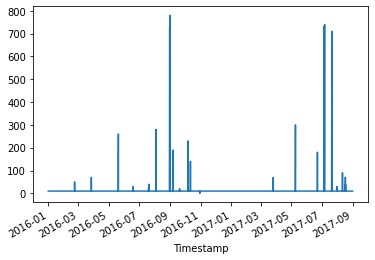

In [ ]:
wtg_data.set_index('Timestamp')['Timediff_min'].plot()

In [ ]:
wtg_data[wtg_data['Gap_Before']].shape[0]/wtg_data.shape[0]

0.0002639249076262823

In [ ]:
logs = 'wind-farm-1-logs-training.csv'
logs_data = pd.read_csv(data_folder + logs, delimiter=';')
logs_data = logs_data[logs_data.UnitTitle == 'T01'].reset_index().drop(columns=['index'])
logs_data['TimeDetected'] = pd.to_datetime(logs_data['TimeDetected'])

In [ ]:
logs_data.head()

,TimeDetected,TimeReset,UnitTitle,Remark,UnitTitleDestination
0,2016-01-01 00:15:27+00:00,NaN,T01,Generator 1 in,NaN
1,2016-01-01 00:15:44+00:00,NaN,T01,External power ref.:2000kW,NaN
2,2016-01-01 00:45:43+00:00,NaN,T01,External power ref.:2000kW,NaN
3,2016-01-01 01:15:43+00:00,NaN,T01,External power ref.:2000kW,NaN
4,2016-01-01 01:45:43+00:00,NaN,T01,External power ref.:2000kW,NaN


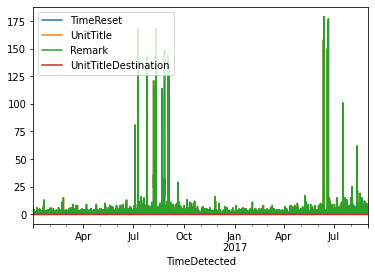

In [ ]:
logs_data.set_index('TimeDetected').resample('10T').count().plot()

In [ ]:
merged_df = pd.merge_asof(wtg_data, logs_data, left_on='Timestamp', right_on='TimeDetected')

In [ ]:
merged_df[['Timestamp', 'TimeDetected', 'Remark']].head(10)

,Timestamp,TimeDetected,Remark
0,2016-01-01 00:00:00+00:00,NaT,NaN
1,2016-01-01 00:10:00+00:00,NaT,NaN
2,2016-01-01 00:20:00+00:00,2016-01-01 00:15:44+00:00,External power ref.:2000kW
3,2016-01-01 00:30:00+00:00,2016-01-01 00:15:44+00:00,External power ref.:2000kW
4,2016-01-01 00:40:00+00:00,2016-01-01 00:15:44+00:00,External power ref.:2000kW
5,2016-01-01 00:50:00+00:00,2016-01-01 00:45:43+00:00,External power ref.:2000kW
6,2016-01-01 01:00:00+00:00,2016-01-01 00:45:43+00:00,External power ref.:2000kW
7,2016-01-01 01:10:00+00:00,2016-01-01 00:45:43+00:00,External power ref.:2000kW
8,2016-01-01 01:20:00+00:00,2016-01-01 01:15:43+00:00,External power ref.:2000kW
9,2016-01-01 01:30:00+00:00,2016-01-01 01:15:43+00:00,External power ref.:2000kW
